In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Thousands of far right organized rioters broke into Brazillian Government building on January 8, just like the Capitol episode in USA two years ago. This people claim that the elections won by current president Lula against former president Bolsonaro were frauded and ask explicitly the army to implement a dictatorship.

Turns out that during the episode, this people made tweets providing the proofs of their own participation. Not only that, over the whole country in the biggest cities, during two months, people set campings in front of Brazilian Army facilities in preparation for the coup d`etat.  You can querry tweets based on the geographic coordinates of the building and the exact time that the invasion happened, and also querry based on the coordinates of the campings, and with a span of time of two months.

The idea is to analyse the network of people who actively participated on the event, the nodes being a twiter user, and the links being their followers. This way we could apply centrality measures and come to a conclusion on who are the most influential users, who is the one responsible fore spreading information the most, etc.

In [ ]:
#accessing google drive
%cd gdrive/MyDrive

In [ ]:
cd followers\ data

In [ ]:
# import necessary libraries
import pandas as pd
import os
import glob
from google.colab import files
import pylab as plt
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

To collect the data we started querying twitter website by the geographic coordinates of Brazillian government and the data of the episode.
We also querry a period of two months for the tweets coming from the geographic location of the campings in the following cities:


*   Brasilia
*   Rio de Janeiro
*   Recife
*   Porto Alegre
*   Sao Paulo
*   Florianopolis
*   Curitiba

We choose only the users that we're clearly indentified as far right.

We then used vicinitas website to get csv files containing the followers of each one of the users. This is a free online tool used to scrape twitter's users data:

https://www.vicinitas.io/free-tools/download-twitter-followers

It can only download a maximum of 5000 followers for users, so it limits our research on people who have less then 5000 followers, which is also interesting, because we will be then looking for "normal" ordinary people (who are not web influencers somehow) who had a significant role in the event. Of course that greater influencers were very relevant, but because they are already widely known, focus on "ordinary" people may be more informative.   











In [ ]:
# use glob to get all the csv files
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.xlsx"))

dict={}
# loop over the list of csv files and write a dictionary with users as keys, and list of followers as users 
for f in csv_files:
	# read the csv file
	df = pd.read_excel(f)
  #here we do some string manipulation to get the right account name, since it has the name of the path attached as well as "_followers.xlsx" added by vicinitas website
	dict[f.split("\\")[-1].replace("content/gdrive/MyDrive/followers data/@","").replace("_followers.xlsx","")[1:]]=list(df['Screen Name'])



In [ ]:
dict

In [ ]:
users=list(dict.keys())
followers_lists=list(dict.values())
number_of_followers=[]
for i in followers_lists:
  number_of_followers.append(len(i))

In [ ]:
edges=[]
edges_numbers=[]
#fulfill edges list with only names of the sources and targets
#fulfill edges_numbers list with only numbers of the sources and targets

for i in range(len(users)):
    for j in range(len(users)):
        if users[i] in followers_lists[j]:
            edges.append((users[i], users[j]))
            edges_numbers.append((i,j))

nodes_list=[]
#fulfill nodes list
for i in range(len(edges)):
    for j in range(2):
        if edges[i][j] not in nodes_list:
            nodes_list.append(edges[i][j])



In [ ]:
lonely_users=[users[i] for i in range(len(users)) if users[i] not in nodes_list]
#lonely_users contains all the nodes with zero degree, that is, with no connection to other nodes
len(lonely_users)

In [318]:
import math
k=0.03
pi=math.pi
strengths=[] #estimating strength of connections to feed page rank
ratios=[]
weigths=[]
for i in range(len(nodes_list)):
  for j in range(len(nodes_list)):
    ratio=number_of_followers[i]/number_of_followers[j]
    ratios.append(ratio)
    weight = (math.atan(k * math.log(ratio)) + (pi / 2)) / pi
    strengths.append((nodes_list[i], nodes_list[j], (weight)))
    weigths.append(weight)

  

Text(0.5, 1.0, 'Weights Function')

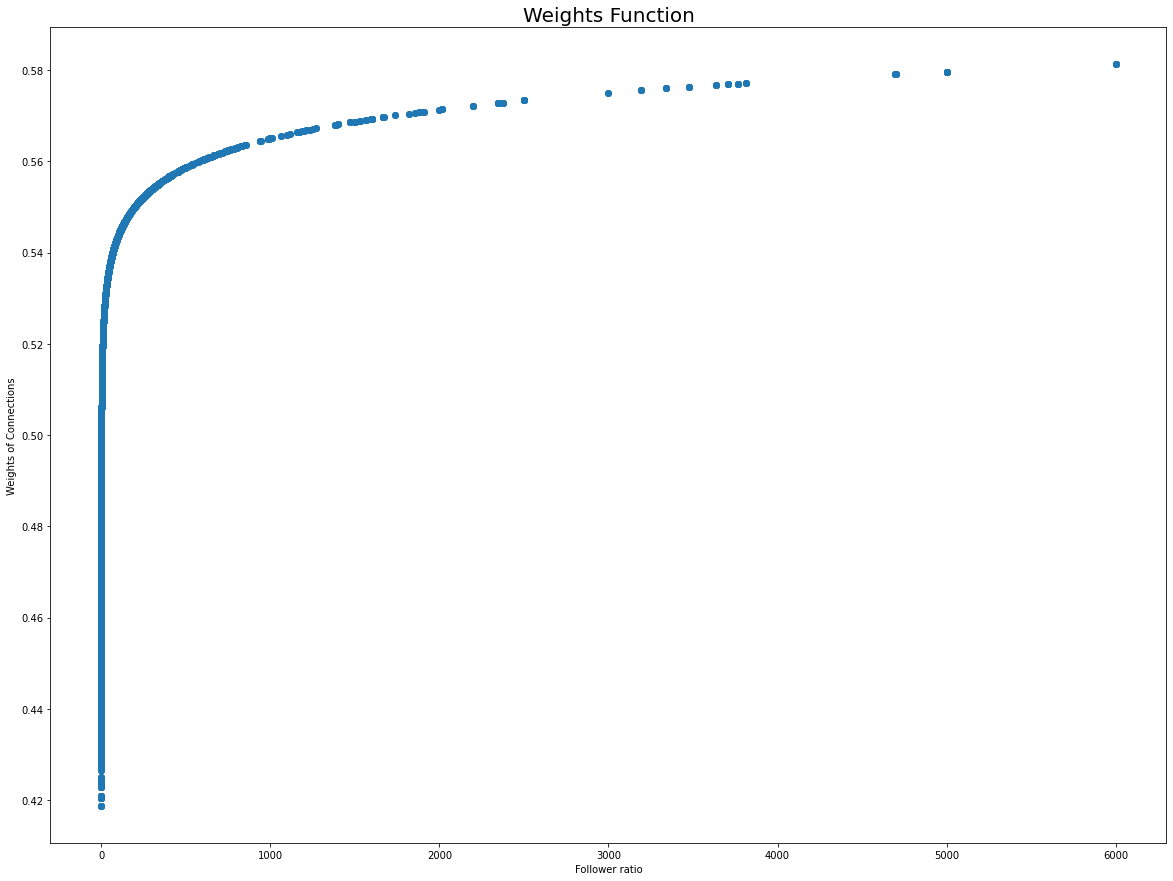

In [319]:
plt.scatter(ratios, weigths)
plt.xlabel("Follower ratio")
plt.ylabel("Weights of Connections")
plt.title("Weights Function", fontsize=20)

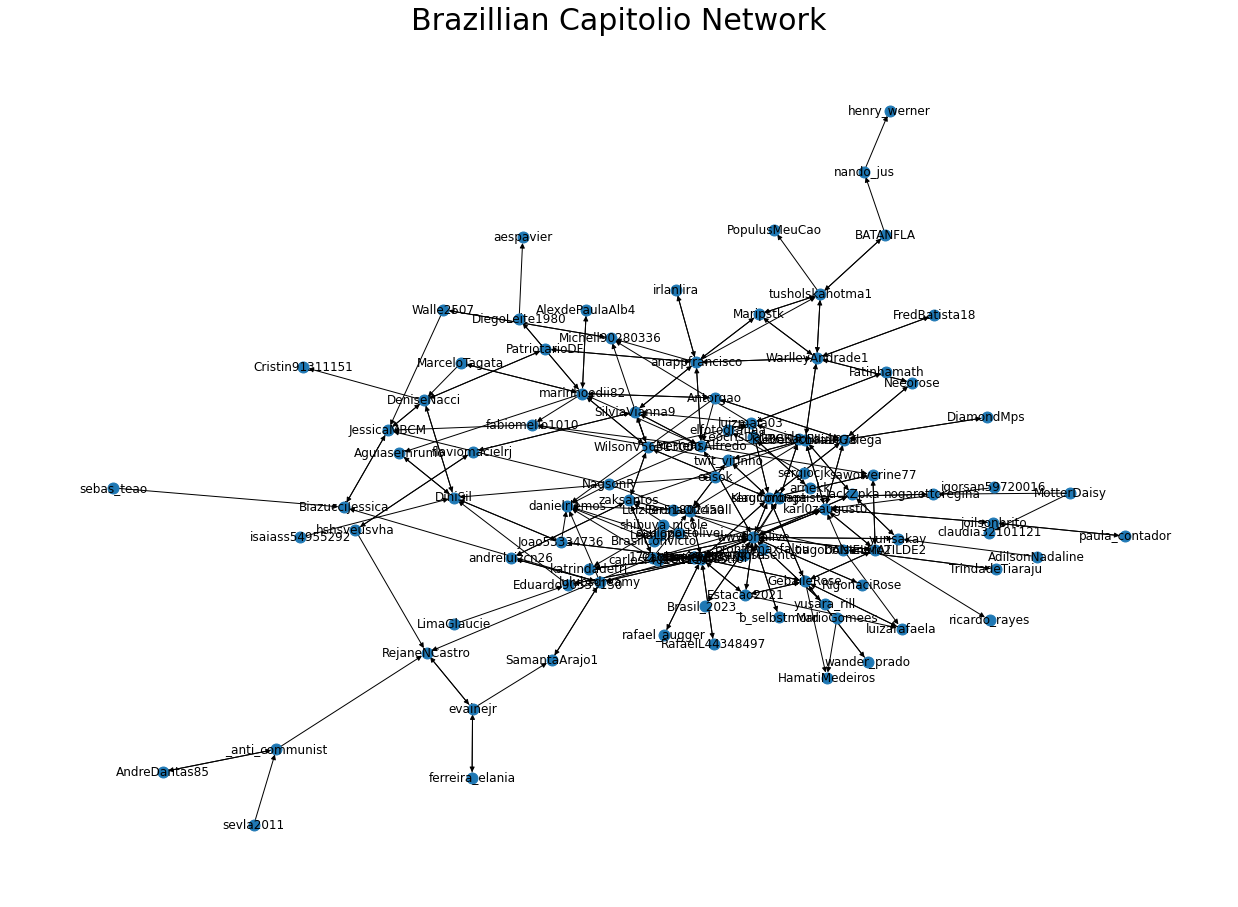

In [ ]:
plt.rcParams["figure.figsize"] = (17,12)

G = nx.DiGraph() #building graph object for network with nodes of the same size
G.add_edges_from(edges)

G1=nx.DiGraph()
G1.add_edges_from(edges)
G1.add_weighted_edges_from(strengths)

nx.draw_kamada_kawai(G,arrowsize=10, node_size=120,with_labels=True)
plt.title("Brazillian Capitolio Network", fontsize=30)
plt.show()
#no centrality measure applied

In [ ]:
G1.nodes()

NodeView(('tiagobolsonaro2', 'luizarafaela', 'TrindadeTiaraju', 'zaksantos', 'karl0zaugust0', 'sergiombaptista', 'GBGSaoPaulo', 'Aguiasemrumo', 'DiniSil', 'arnekk', 'LeocrisDalmeida', 'sevla2011', '_anti_communist', 'sergiocjk', 'elfotografiaa', 'joilsonbrito', 'paula_contador', 'andreluizcn26', 'lulubsdreamy', 'GebaileRose', 'sebas_teao', 'BiazucciJessica', 'WarlleyAndrade1', 'KleberUchoa1976', 'anappfrancisco', 'FredBatista18', 'tusholskahotma1', 'Neeorose', 'Maripstk', 'JackZpka', 'twit_vitinho', 'BrunaOficiaall', 'luizmaia03', 'PatriotarioDF', 'irlanlira', 'MertensAlfredo', 'SilviaVianna9', 'Michell90280336', 'BATANFLA', 'PopulusMeuCao', 'LillianGalega', 'wander_prado', 'igorsan59720016', 'DeniseNacci', 'Joao53334736', 'marinhoedii82', 'AlexdePaulaAlb4', 'WilsonV56313000', 'Antorgao', 'MarceloTagata', 'fabiomello1010', 'DiegoLeite1980', 'DiamondMps', 'KlauCoronga', 'ferreira_elania', 'evainejr', 'predsoncastro', 'wwwbhalive', 'rafael_augger', 'Eduardo90533150', 'Estacao2021', 'Rafa

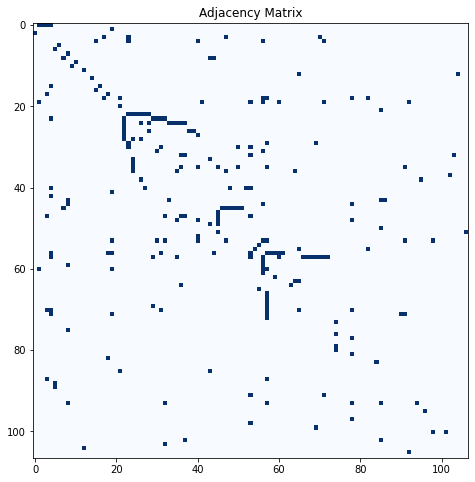

In [ ]:
# Map node labels to integer values
node_to_int = {node: i for i, node in enumerate(G.nodes())}

# Compute the adjacency matrix
n = G.number_of_nodes()
A = np.zeros((n, n))
for u, v in G.edges():
    i = node_to_int[u]
    j = node_to_int[v]
    A[i, j] = 1

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (13,8)

adj_matrix = A

# Plot the adjacency matrix
plt.imshow(adj_matrix, cmap='Blues', interpolation='nearest')
plt.title("Adjacency Matrix")
plt.show()


In [ ]:
B = nx.to_numpy_array(G1, weight='weight')

In [317]:
import math
k=0.03
pi=math.pi
strengths=[] #estimating strength of connections to feed page rank
for i in range(len(nodes_list)):
  for j in range(len(nodes_list)):
    ratio=number_of_followers[i]/number_of_followers[j]
    weight = (math.atan(k * log(ratio)) + (pi / 2)) / pi       #using arctan(x) function
    strengths.append((nodes_list[i], nodes_list[j], (weight)/100))

G1=nx.DiGraph()
G1.add_edges_from(edges)
G1.add_weighted_edges_from(strengths)   #create a graph object including the weigths calculated

# Convert the graph to an adjacency matrix
B = nx.to_numpy_array(G1, weight='weight')

# Create a heat map of the matrix
fig, ax = plt.subplots()
im = ax.imshow(B, cmap='seismic')

# Add a color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Remove the tick labels from the axis
ax.tick_params(labelbottom=False, labelleft=False)

# Loop over data dimensions and create text annotations.
for i in range(len(G1)):
    for j in range(len(G1)):
        text = ax.text(j, i, "{:.1f}".format(B[i, j]),
                       ha="center", va="center",
                       color="black" if B[i, j] < 0 else "white")

plt.figure(figsize=(30,20))

# Display the plot
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-317-f203e8b36807>", line 8, in <module>
    weight = (math.atan(k * log(ratio)) + (pi / 2)) / pi       #using arctan(x) function
NameError: name 'log' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/us

NameError: ignored

Centrality measures are used to identify the most important or influential nodes in a social network. Here are the mostly know ones:

*   Degree centrality: Degree centrality measures the number of connections that a node has in the network. Nodes with high degree centrality are well-connected and often have a lot of influence in the network.
*   Betweenness centrality: Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network. Nodes with high betweenness centrality act as bridges between different parts of the network and can have significant influence on the flow of information or resources in the network.
*   Closeness centrality: Closeness centrality measures how close a node is to all other nodes in the network. Nodes with high closeness centrality can reach other nodes quickly and efficiently, making them important for the flow of information or resources in the network.
*   Eigenvector centrality measures a node's influence in the network based on the importance of its connections. Nodes with high eigenvector centrality are connected to other important nodes in the network and have a lot of influence.
*   PageRank centrality: PageRank centrality is a variant of eigenvector centrality that is used to rank web pages in search engines. In a social network, PageRank centrality measures a node's importance based on the importance of the nodes that are connected to it.
*   Katz centrality: Katz centrality is another variant of eigenvector centrality that takes into account the influence of all nodes in the network, not just direct connections. Nodes with high Katz centrality are connected to other important nodes in the network, either directly or indirectly.

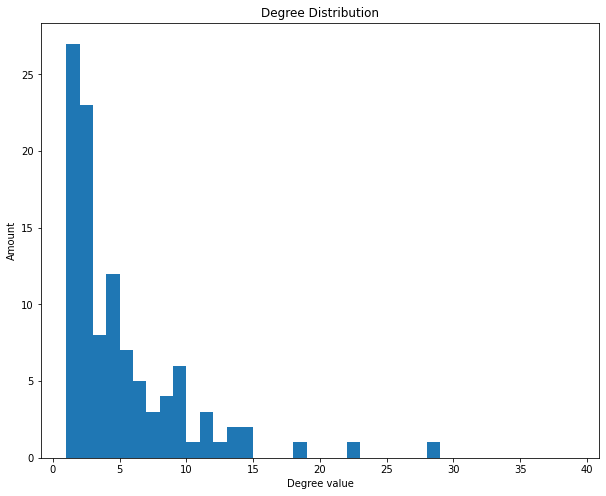

In [ ]:
degrees={}
#show the degree for each node
for i in range(len(nodes_list)):
    count=0
    for j in range(len(edges)):
        if nodes_list[i] in edges[j]:
            count=count+1
    degrees[nodes_list[i]]=count


def choose_from_degree(degrees, k=2):
    #this function can tell you which nodes have a certain degree 
    if k==0:
      return lonely_users
    else:
      result=[]
      deeg=list(degrees.values())
      keys=list(degrees.keys())
      for i in range(len(degrees.values())):
          if k==deeg[i]:
              result.append(keys[i])
      return result

degree_dist={}

for i in range(1,40):
  param=choose_from_degree(degrees, i)
  degree_dist[i]=len(param)

# Create a larger figure
plt.figure(figsize=(10, 8))

bins = list(degree_dist.keys())
quantities = list(degree_dist.values())

# Create a histogram
plt.hist(bins, bins=bins, weights=quantities)

# Add labels and title
plt.xlabel('Degree value')
plt.ylabel('Amount')
plt.title('Degree Distribution')

# Show the plot
plt.show()

In [ ]:
avg = np.average(bins, weights=quantities)

print("Average value:", avg)

Average value: 4.616822429906542


In [ ]:
len(lonely_users)

134

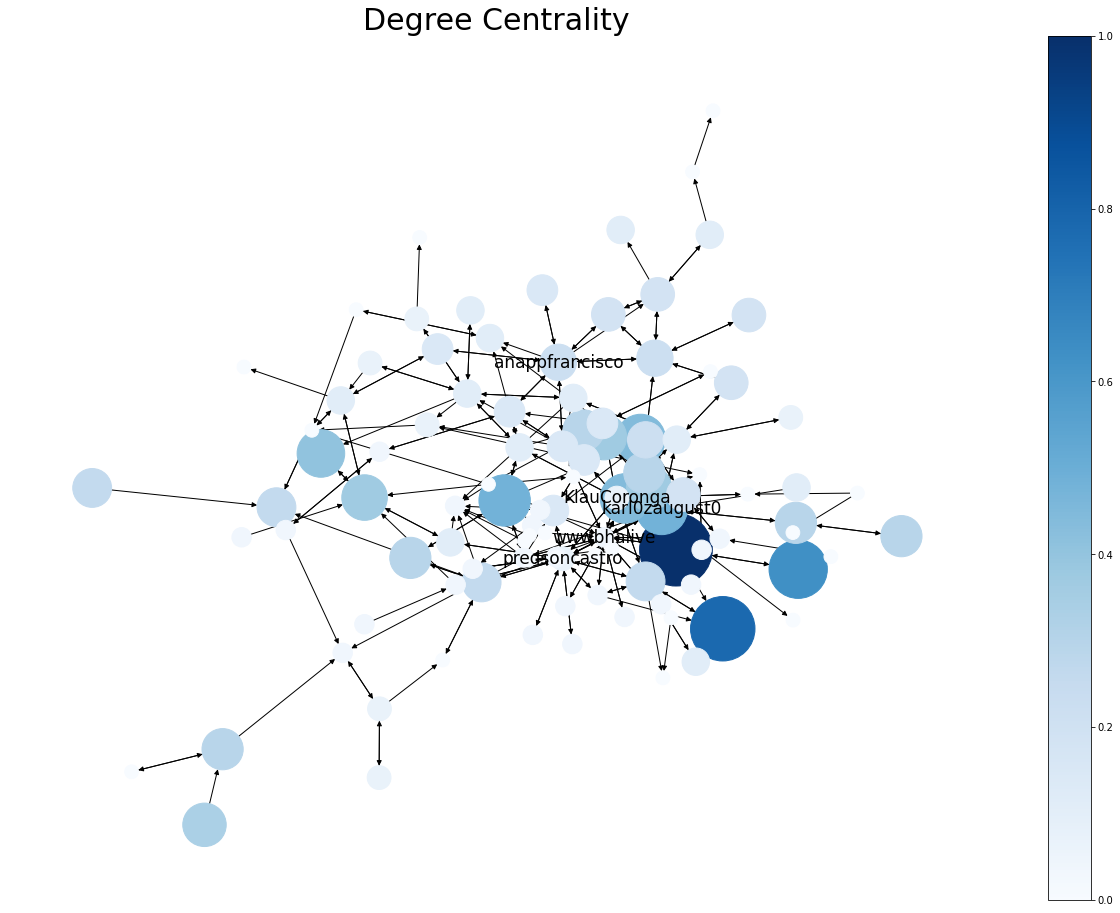

 the nodes with highest degrees are: ['wwwbhalive', 'predsoncastro', 'KlauCoronga', 'anappfrancisco', 'karl0zaugust0']


In [ ]:
#apply degree centrality algorithm
degree_dict=nx.degree_centrality(G)
degreepd=pd.DataFrame(degree_dict.items()).sort_values(by=1, ascending=False)
#creating dataframe and ordering elements by highest degree
degreepd=degreepd.rename(columns={0: "Names", 1: 'degree score'})


weights = list(degreepd.iloc[:, 1])
weights=[20000*i for i in weights]
names = list(degreepd.iloc[:, 0])
node_weights = {}
for i in range(len(names)):
    node_weights[names[i]] = weights[i]

first_ten_rows = degreepd.head(5)
champions=first_ten_rows['Names'].tolist()
nos=list(G.nodes())
label={}
for i in nos:
  label[i]=[i if i in champions else ""][0]

plt.figure(figsize=(17,12))
cmap = plt.cm.Blues

nx.draw_kamada_kawai(G, node_size=weights,node_color=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')


# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
plt.colorbar(sm)

# show the plot
plt.title("Degree Centrality", fontsize=30)
plt.show()
print(" the nodes with highest degrees are:", champions[:5])

In [ ]:
first_ten_rows

Names  degree score
57      wwwbhalive      0.264151
56   predsoncastro      0.207547
53     KlauCoronga      0.169811
24  anappfrancisco      0.132075
4    karl0zaugust0      0.132075

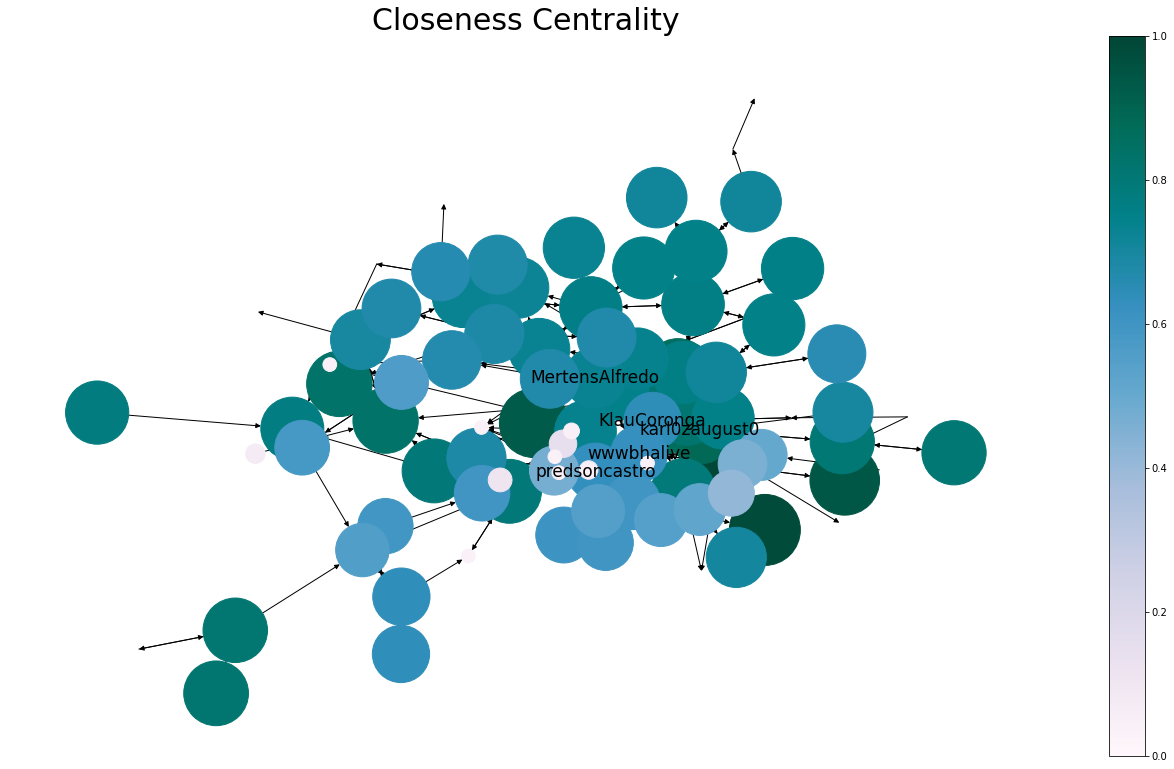

 the nodes with highest closeness score are: ['predsoncastro', 'wwwbhalive', 'KlauCoronga', 'karl0zaugust0', 'MertensAlfredo']


In [ ]:
#closeness
closeness_dict=nx.closeness_centrality(G)
closepd=pd.DataFrame(closeness_dict.items()).sort_values(by=1, ascending=False)
#creating dataframe and ordering elements by highest closeness
closepd=closepd.rename(columns={0: "Names", 1: 'closeness'})

weights = list(closepd.iloc[:, 1])
weights=[20000*i for i in weights]
names = list(closepd.iloc[:, 0])
node_weights = {}
for i in range(len(names)):
    node_weights[names[i]] = weights[i]

first_ten_rows = closepd.head(5)
champions=first_ten_rows['Names'].tolist()
nos=list(G.nodes())
label={}
for i in nos:
  label[i]=[i if i in champions else ""][0]

plt.figure(figsize=(18, 10))
cmap = plt.cm.PuBuGn

nx.draw_kamada_kawai(G, node_size=weights,node_color=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')

# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
plt.colorbar(sm)

# show the plot
plt.title("Closeness Centrality", fontsize=30)
plt.show()
print(" the nodes with highest closeness score are:", champions[:5])

In [ ]:
first_ten_rows

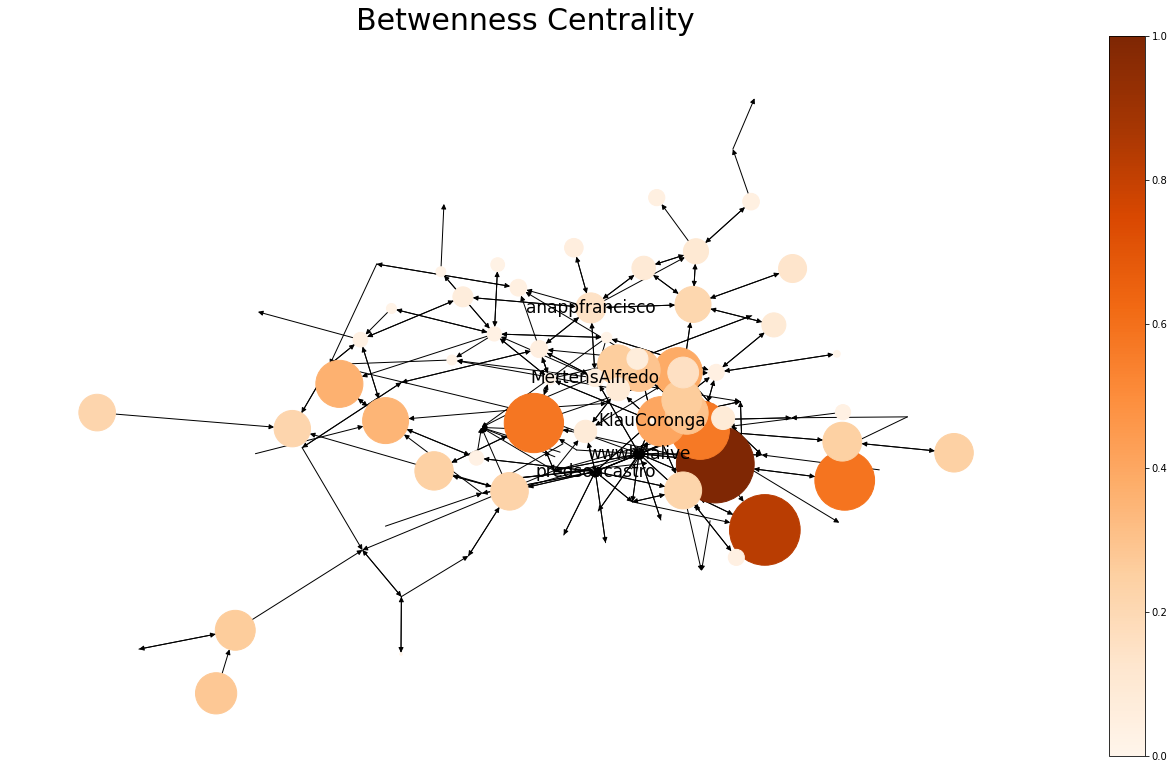

 the nodes with highest betwenness are: ['wwwbhalive', 'predsoncastro', 'anappfrancisco', 'KlauCoronga', 'MertensAlfredo']


In [ ]:
#betweenness
bet_dict=nx.betweenness_centrality(G)

betpd=pd.DataFrame(bet_dict.items()).sort_values(by=1, ascending=False)
#creating dataframe and ordering elements by highest betweenness
betpd=betpd.rename(columns={0: "Names", 1: 'betwenness'})


weights = list(betpd.iloc[:, 1])
weights=[40000*i for i in weights]
names = list(betpd.iloc[:, 0])
node_weights = {}
for i in range(len(names)):
    node_weights[names[i]] = weights[i]

first_ten_rows = betpd.head(5)
champions=first_ten_rows['Names'].tolist()
nos=list(G.nodes())
label={}
for i in nos:
  label[i]=[i if i in champions else ""][0]

plt.figure(figsize=(18, 10))
cmap = plt.cm.Oranges

nx.draw_kamada_kawai(G, node_size=weights,node_color=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')


# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
plt.colorbar(sm)
# show the plot
plt.title("Betwenness Centrality", fontsize=30)
plt.show()
print(" the nodes with highest betwenness are:", champions[:5])


In [ ]:
first_ten_rows

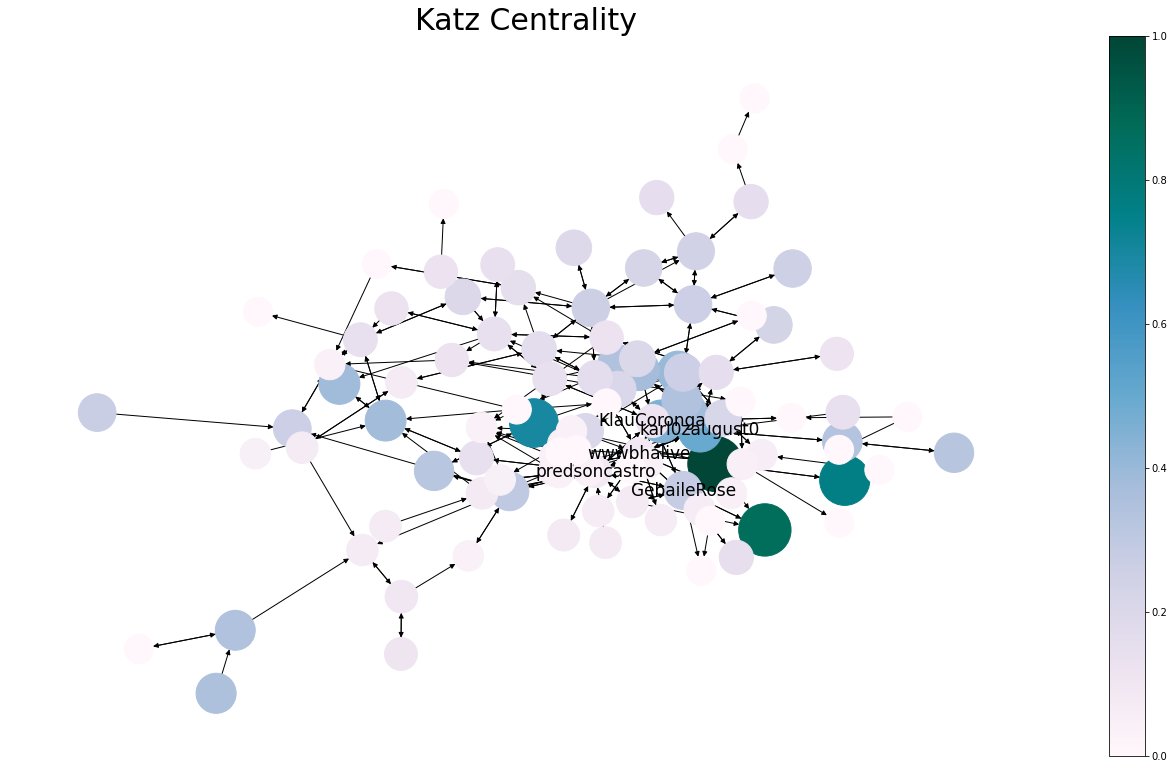

 the nodes with highest katz score are: ['wwwbhalive', 'predsoncastro', 'KlauCoronga', 'karl0zaugust0', 'GebaileRose']


In [ ]:
#katz centrality
kat_dict=nx.katz_centrality(G)
katpd=pd.DataFrame(kat_dict.items()).sort_values(by=1, ascending=False)
#creating dataframe and ordering elements by highest katz
katpd=katpd.rename(columns={0: "Names", 1: 'katz score'})

weights = list(katpd.iloc[:, 1])
weights=[13000*i for i in weights]
names = list(katpd.iloc[:, 0])
node_weights = {}
for i in range(len(names)):
    node_weights[names[i]] = weights[i]

first_ten_rows = katpd.head(5)
champions=first_ten_rows['Names'].tolist()
nos=list(G.nodes())
label={}
for i in nos:
  label[i]=[i if i in champions else ""][0]

plt.figure(figsize=(18, 10))
cmap = plt.cm.PuBuGn

nx.draw_kamada_kawai(G, node_size=weights,node_color=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')

# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
plt.colorbar(sm)

# show the plot
plt.title("Katz Centrality", fontsize=30)
plt.show()
print(" the nodes with highest katz score are:", champions[:5])

In [ ]:
#eigenvector centrality
eigen_dict=nx.eigenvector_centrality(G1)

eigenpd=pd.DataFrame(eigen_dict.items()).sort_values(by=1, ascending=False)
#creating dataframe and ordering elements by highest betweenness

In [ ]:
eigenpd=eigenpd.rename(columns={0: "Names", 1: 'eigen score'})
eigenpd

In [ ]:
#eigenvector centrality
eigen_dict=nx.eigenvector_centrality(G1)

eigenpd=pd.DataFrame(eigen_dict.items()).sort_values(by=1, ascending=False)
#creating dataframe and ordering elements by highest betweenness
eigenpd= eigenpd.rename(columns={0: "Names", 1: 'eigen score'})

weights = list(eigenpd.iloc[:, 1])
weights=[13000*i for i in weights]
names = list(eigenpd.iloc[:, 0])
node_weights = {}
for i in range(len(names)):
    node_weights[names[i]] = weights[i]

first_ten_rows = eigenpd.head(5)
champions=first_ten_rows['Names'].tolist()
nos=list(G.nodes())
label={}
for i in nos:
  label[i]=[i if i in champions else ""][0]

plt.figure(figsize=(18, 10))
cmap = plt.cm.YlOrBr

nx.draw_kamada_kawai(G, node_size=weights,node_color=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')


# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
plt.colorbar(sm)
# show the plot
plt.title("Eigenvector Centrality", fontsize=30)
plt.show()
print(" the nodes with highest eigen scores are:", champions[:5])


In [ ]:
#eigenvector centrality
eigen_dict=nx.eigenvector_centrality(G1)

eigenpd=pd.DataFrame(eigen_dict.items()).sort_values(by=1, ascending=False)
#creating dataframe and ordering elements by highest betweenness
eigenpd= eigenpd.rename(columns={0: "Names", 1: 'eigen score'})
eigenpd

In [ ]:
first_ten_rows

In [89]:
def pagerank(A, eps=1.0e-20, d=0.85):
    """
    Computes the PageRank of a graph given its adjacency matrix using the power iteration method.

    :param A: The adjacency matrix of the graph, as a numpy array.
    :param eps: The convergence threshold for the power iteration method.
    :param d: The damping factor, which determines the probability of following a link vs. teleporting to a random page.
    :return: A numpy array representing the PageRank of each node in the graph.
    """
    n = A.shape[0]
    v = np.random.rand(n, 1)
    v = v / np.linalg.norm(v, 1)
    last_v = np.ones((n, 1), dtype=np.float64) * np.inf

    # Compute the out-degree of each node and ensure matrix is column-stochastic
    out_degree = np.sum(A, axis=1)
    A = A / out_degree[:, np.newaxis]
    
    # Add a teleportation term to the adjacency matrix
    M = d * A + (1 - d) / n

    # Iterate until convergence or max iterations reached
    max_iters = 1000
    for i in range(max_iters):
        last_v = v
        v = M @ v
        v = v / np.linalg.norm(v, 1)

        # Check for convergence
        if np.linalg.norm(v - last_v, 2) < eps:
            break

    return v


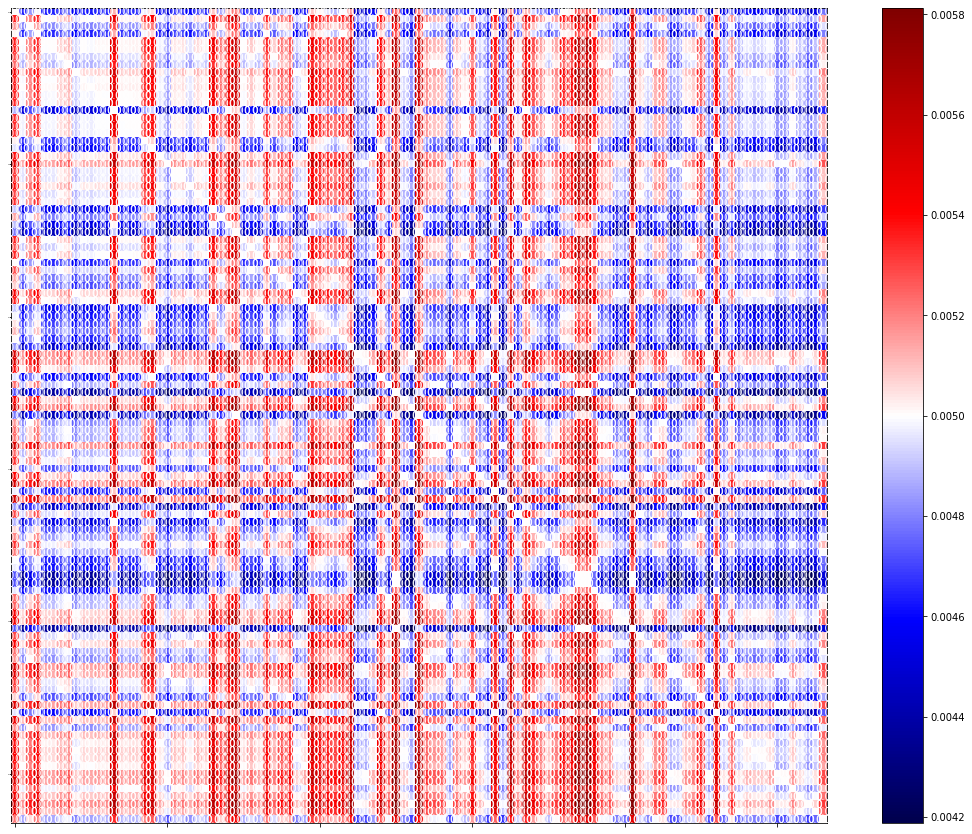

<Figure size 2160x1440 with 0 Axes>

In [155]:
import math
k=0.03
pi=math.pi
strengths=[] #estimating strength of connections to feed page rank
for i in range(len(nodes_list)):
  for j in range(len(nodes_list)):
    ratio=number_of_followers[i]/number_of_followers[j]
    weight = (math.atan(k * math.log(ratio)) + (pi / 2)) / pi       #using arctan(x) function
    strengths.append((nodes_list[i], nodes_list[j], (weight)/100))

G1=nx.DiGraph()
G1.add_edges_from(edges)
G1.add_weighted_edges_from(strengths)   #create a graph object including the weigths calculated

# Convert the graph to an adjacency matrix
B = nx.to_numpy_array(G1, weight='weight')

# Create a heat map of the matrix
fig, ax = plt.subplots()
im = ax.imshow(B, cmap='seismic')

# Add a color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Remove the tick labels from the axis
ax.tick_params(labelbottom=False, labelleft=False)

# Loop over data dimensions and create text annotations.
for i in range(len(G1)):
    for j in range(len(G1)):
        text = ax.text(j, i, "{:.1f}".format(B[i, j]),
                       ha="center", va="center",
                       color="black" if B[i, j] < 0 else "white")

plt.figure(figsize=(30,20))

# Display the plot
plt.show()

              Names      pagerank
64   flaviomacielrj  1.131565e-19
62      LimaGlaucie  1.117023e-19
57       wwwbhalive  1.117023e-19
104   AndreDantas85  1.117023e-19
45    marinhoedii82  1.112252e-19 

              Names      pagerank
64   flaviomacielrj  1.119332e-19
62      LimaGlaucie  1.104948e-19
57       wwwbhalive  1.104948e-19
104   AndreDantas85  1.104948e-19
45    marinhoedii82  1.100228e-19 

              Names      pagerank
64   flaviomacielrj  1.134158e-19
62      LimaGlaucie  1.119583e-19
57       wwwbhalive  1.119583e-19
104   AndreDantas85  1.119583e-19
45    marinhoedii82  1.114800e-19 

              Names      pagerank
64   flaviomacielrj  1.119901e-19
62      LimaGlaucie  1.105509e-19
57       wwwbhalive  1.105509e-19
104   AndreDantas85  1.105509e-19
45    marinhoedii82  1.100786e-19 

              Names      pagerank
64   flaviomacielrj  1.136968e-19
62      LimaGlaucie  1.122356e-19
57       wwwbhalive  1.122356e-19
104   AndreDantas85  1.122356e-19
45    

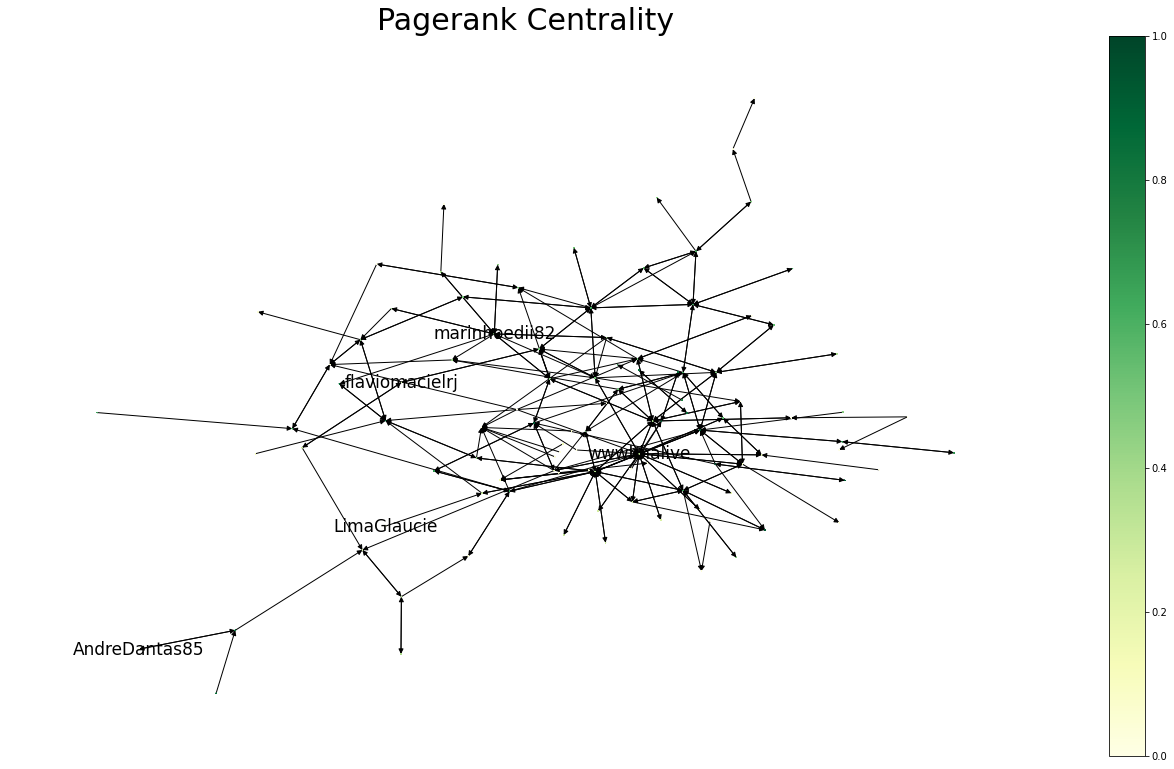

 the nodes with highest pagerank score are: ['flaviomacielrj', 'LimaGlaucie', 'wwwbhalive', 'AndreDantas85', 'marinhoedii82']


In [316]:
  import math
  x=0.03
  pi=math.pi
  strengths=[] #estimating strength of connections to feed page rank
  for i in range(len(nodes_list)):
    for j in range(len(nodes_list)):
      ratio=number_of_followers[i]/number_of_followers[j]
      weight = (math.atan(x*ratio) + (pi / 2)) / pi       #using arctan(x) function
      strengths.append((nodes_list[i], nodes_list[j], (weight)/100))

  G1=nx.DiGraph()
  G1.add_edges_from(edges)
  G1.add_weighted_edges_from(strengths)   #create a graph object including the weigths calculated

  # Convert the graph to an adjacency matrix
  B = nx.to_numpy_array(G1, weight='weight')
  for c in range(5):
    # Compute the PageRank of the graph
    pr = pagerank(B,d=0.85)

    nodes=list(G.nodes())
    # Print the PageRank values
    pr_dict = {nodes[i]: float(pr[i]) for i in range(len(pr))}
    pagerank_pd=pd.DataFrame(pr_dict.items()).sort_values(by=1, ascending=False)
    pagerank_pd= pagerank_pd.rename(columns={0: "Names", 1: 'pagerank'})

    weights = list(pagerank_pd.iloc[:, 1])
    weights=[145000*i for i in weights]
    names = list(pagerank_pd.iloc[:, 0])
    node_weights = {}
    for i in range(len(names)):
        node_weights[names[i]] = weights[i]

    first_ten_rows = pagerank_pd.head(5)
    print(first_ten_rows, "\n")
    champions=first_ten_rows['Names'].tolist()
    nos=list(G.nodes())
    label={}
    for i in nos:
      label[i]=[i if i in champions else ""][0]

plt.figure(figsize=(18, 10))
cmap = plt.cm.YlGn

nx.draw_kamada_kawai(G, node_size=weights,node_color=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')


# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
plt.colorbar(sm)
# show the plot
plt.rcParams["figure.figsize"] = (20,15)
plt.title("Pagerank Centrality", fontsize=30)
plt.show()
print(" the nodes with highest pagerank score are:", champions[:5])


In [321]:
first_ten_rows

Names      pagerank
64   flaviomacielrj  1.136968e-19
62      LimaGlaucie  1.122356e-19
57       wwwbhalive  1.122356e-19
104   AndreDantas85  1.122356e-19
45    marinhoedii82  1.117562e-19

In [ ]:
first_ten_rows = pagerank.head(5)
champions=first_ten_rows['Names'].tolist()
nos=list(G.nodes())
label={}
for i in nos:
  label[i]=[i if i in champions else ""][0]
plt.figure(figsize=(18, 10))
cmap = plt.cm.Reds

nx.draw_kamada_kawai(G, node_size=weights,node_color=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')

# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
plt.colorbar(sm)

# show the plot
plt.rcParams["figure.figsize"] = (20,15)
plt.title("Hubs Score", fontsize=30)
plt.show()

In [ ]:
first_ten_rows

In [ ]:
def compute_hubs(A, max_iter=100):
    n = A.shape[0]
    hubs = np.ones(n)
    for i in range(max_iter):
        authorities = A.T @ hubs
        hubs = A @ authorities
        hubs = hubs / np.linalg.norm(hubs)
    return [hubs, authorities]

# Compute the HITS scores
hubs= list(compute_hubs(A)[0])
hubs_dict = {nodes[i]: float(hubs[i]) for i in range(len(hubs))}
hubs_pd=pd.DataFrame(hubs_dict.items()).sort_values(by=1, ascending=False)
hubs_pd= hubs_pd.rename(columns={0: "Names", 1: 'hubs score'})

weights = list(hubs_pd.iloc[:, 1])
weights=[13000*i for i in weights]
names = list(hubs_pd.iloc[:, 0])
node_weights = {}
for i in range(len(names)):
    node_weights[names[i]] = weights[i]

first_ten_rows = hubs_pd.head(5)
champions=first_ten_rows['Names'].tolist()
nos=list(G.nodes())
label={}
for i in nos:
  label[i]=[i if i in champions else ""][0]
plt.figure(figsize=(18, 10))
cmap = plt.cm.Reds

nx.draw_kamada_kawai(G, node_size=weights,node_color=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')

# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
plt.colorbar(sm)

# show the plot
plt.rcParams["figure.figsize"] = (20,15)
plt.title("Hubs Score", fontsize=30)
plt.show()
print(" the greatest hubs are:", champions[:5])

In [ ]:
auth=list(compute_hubs(A)[1])
auth_dict = {nodes[i]: float(auth[i]) for i in range(len(auth))}
auth_pd=pd.DataFrame(auth_dict.items()).sort_values(by=1, ascending=False)
auth_pd=auth_pd.rename(columns={0: "Names", 1: 'Authority score'})

weights = list(auth_pd.iloc[:, 1])
weights=[1700*i for i in weights]
names = list(auth_pd.iloc[:, 0])
node_weights = {}
for i in range(len(names)):
    node_weights[names[i]] = weights[i]

first_ten_rows = auth_pd.head(5)
champions=first_ten_rows['Names'].tolist()
nos=list(G.nodes())
label={}
for i in nos:
  label[i]=[i if i in champions else ""][0]

plt.figure(figsize=(24, 12))
cmap = plt.cm.Purples

# Add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
plt.colorbar(sm)
nx.draw_kamada_kawai(G, node_size=weights,node_color=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')
plt.title("Authorities Score", fontsize=30)
print("the greatest authorities are", champions[:5])

In [309]:
import numpy as np

def pagerank(M, num_iterations=100, d=0.85):
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M) + (((1 - d) / N) * np.ones((N, N)))
    for i in range(num_iterations):
        v = M_hat @ v
    return v
 
def normalize_adjacency_matrix(A):
    # Compute the diagonal degree matrix
    D = np.diag(np.sum(A, axis=1))
    # Compute the normalized adjacency matrix
    D_sqrt_inv = np.diag(1.0 / np.sqrt(np.sum(A, axis=1)))
    A_norm = D_sqrt_inv @ A @ D_sqrt_inv
    return A_norm


G.nodes()
nos=list(G.nodes())
pgdict={}
for i in range(len(G.nodes())):
  pgdict[nos[i]]=pagerank(normalize_adjacency_matrix(B)).tolist()[i]


pagerankpd=pd.DataFrame(pgdict).transpose()
pagerankpd=pagerankpd.sort_values(by=0, ascending=False)
pagerankpd=pagerankpd.rename(columns={0: "Pagerank"})
champions=pagerankpd.head()
print(champions)
champions=champions.index.tolist()

                Pagerank
flaviomacielrj  0.009442
wwwbhalive      0.009427
AndreDantas85   0.009422
LimaGlaucie     0.009419
marinhoedii82   0.009411


the PageRank Scores are ['flaviomacielrj', 'LimaGlaucie', 'AndreDantas85', 'wwwbhalive', 'marinhoedii82']


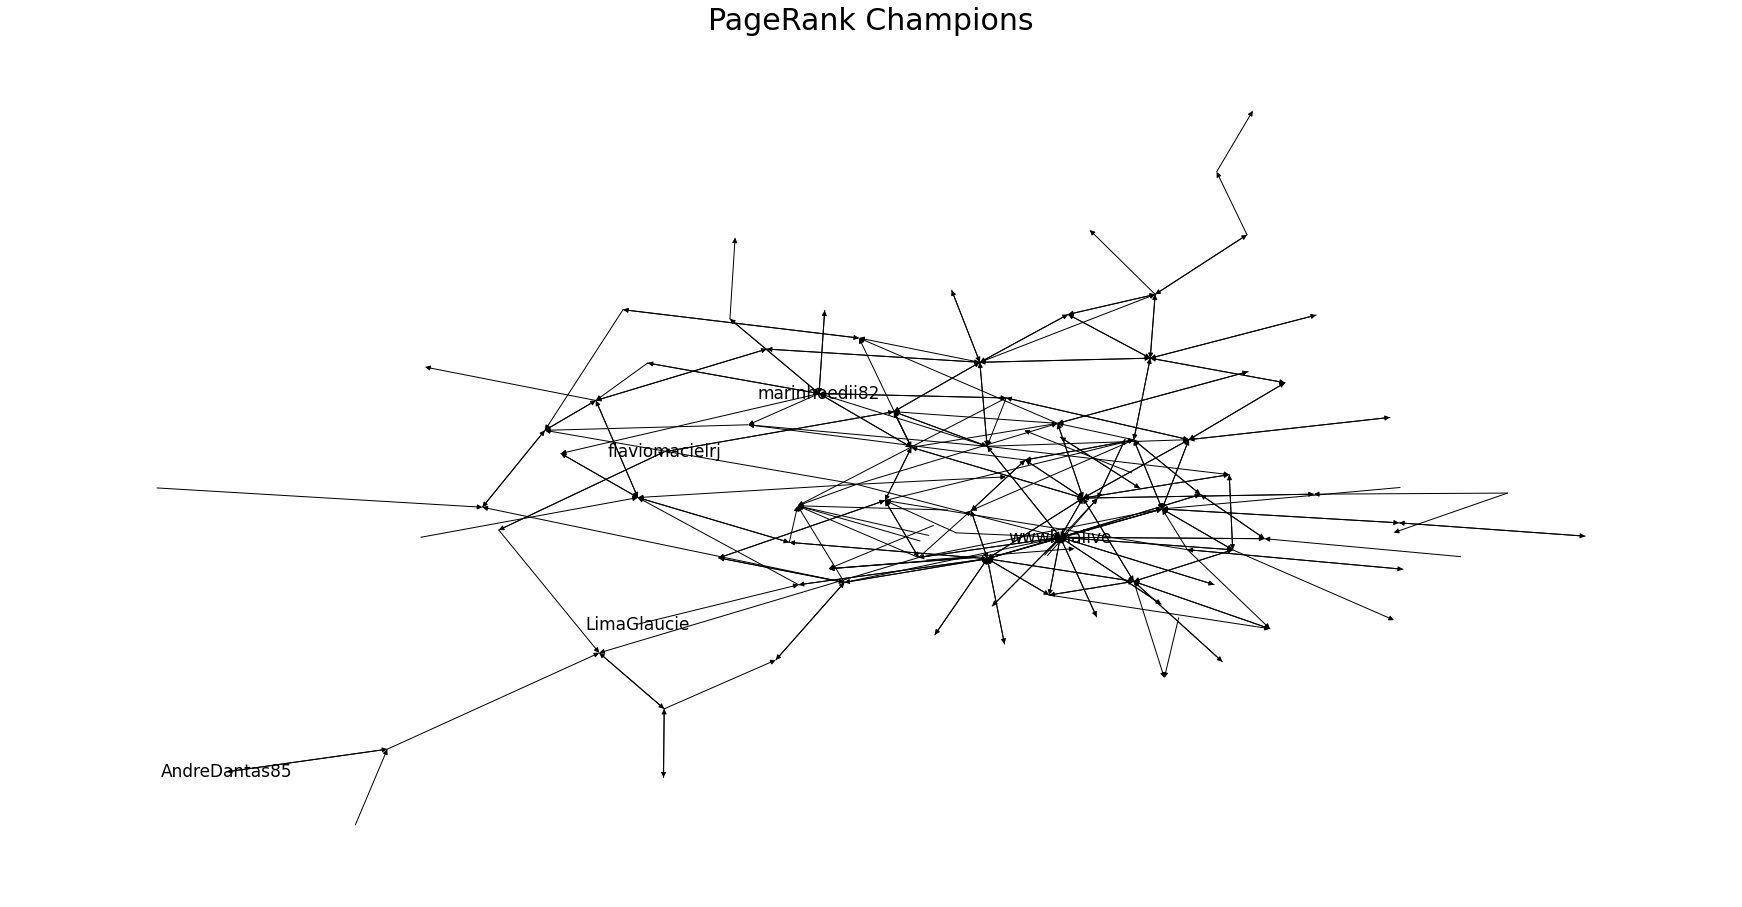

In [305]:
weights = pagerank(normalize_adjacency_matrix(B)).tolist()
names = list(G.nodes())
node_weights = {}
for i in range(len(names)):
    node_weights[names[i]] = weights[i]
label={}
for i in nos:
  label[i]=[i if i in champions else ""][0]
plt.figure(figsize=(24, 12))
cmap = plt.cm.Purples

nx.draw_kamada_kawai(G, node_size=weights, cmap=cmap, vmin=min(weights), vmax=max(weights))
nx.draw_networkx_labels(G, nx.kamada_kawai_layout(G),labels=label, font_size=17, font_color='k')

plt.title("PageRank Champions", fontsize=30)
print("the PageRank Scores are", champions[:5])

[[0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910016761,
  0.009335686910

In [237]:
class

SyntaxError: ignored

In [190]:

def is_strongly_connected(M):
    # Compute the reachability matrix using Warshall's algorithm
    R = np.copy(M)
    n = M.shape[0]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                R[i,j] = R[i,j] or (R[i,k] and R[k,j])
    # Check if the reachability matrix is a full matrix
    return np.all(R)

print(is_strongly_connected(B))

True
